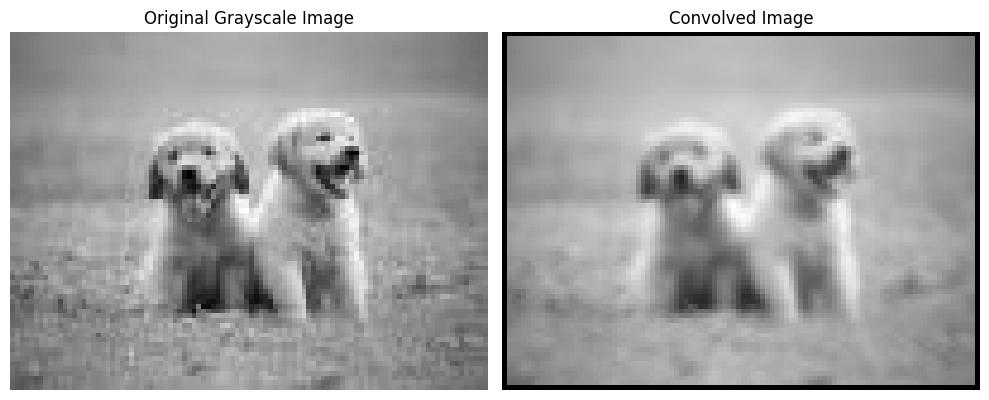

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Importing the 'io' module from scikit-image allows us to work with image input and output,
from skimage import io, color

# Load a grayscale image
image_path = 'Image10.jpg'
image = io.imread(image_path)
image_gray = color.rgb2gray(image)  # Convert to grayscale

# Define a simple 3x3 kernel for blurring
kernel = np.array([[0, 1, 2],
                   [2, 2, 0],
                   [0, 1, 2]])

# Normalize the kernel
kernel = kernel / np.sum(kernel)

# Perform 2D convolution
convolved_image = np.zeros_like(image_gray)
for i in range(1, image_gray.shape[0] - 1):
    for j in range(1, image_gray.shape[1] - 1):
        convolved_image[i, j] = np.sum(image_gray[i-1:i+2, j-1:j+2] * kernel)

# Display the original and convolved images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Convolved Image')
plt.axis('off')

plt.tight_layout()
plt.show()


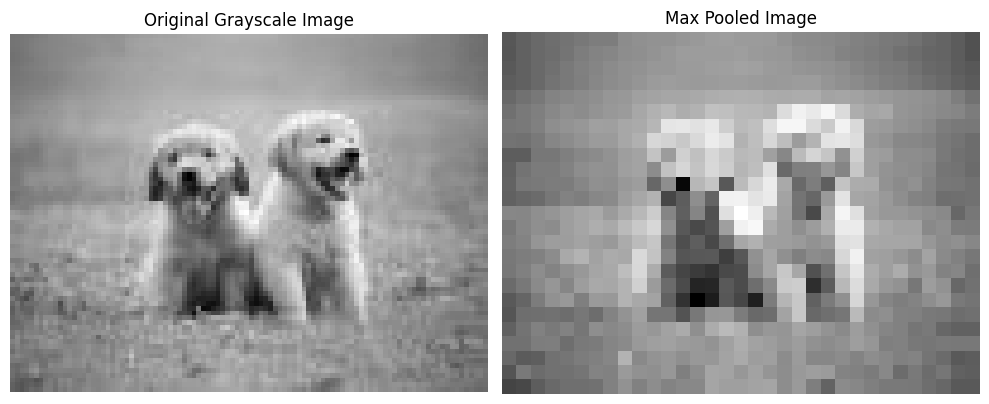

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Load a grayscale image
image_path = 'Image10.jpg'
image = io.imread(image_path)
image_gray = color.rgb2gray(image)  # Convert to grayscale

# Define the pooling window size
pool_size = 3

# Perform max pooling
def max_pooling(input_matrix, pool_size):
    height, width = input_matrix.shape
    new_height = height // pool_size
    new_width = width // pool_size
    pooled_matrix = np.zeros((new_height, new_width))

    for i in range(new_height):
        for j in range(new_width):
            start_row, end_row = i * pool_size, (i + 1) * pool_size
            start_col, end_col = j * pool_size, (j + 1) * pool_size
            pooled_matrix[i, j] = np.max(input_matrix[start_row:end_row, start_col:end_col])

    return pooled_matrix

pooled_image = max_pooling(image_gray, pool_size)

# Display the original and pooled images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pooled_image, cmap='gray')
plt.title('Max Pooled Image')
plt.axis('off')

plt.tight_layout()
plt.show()

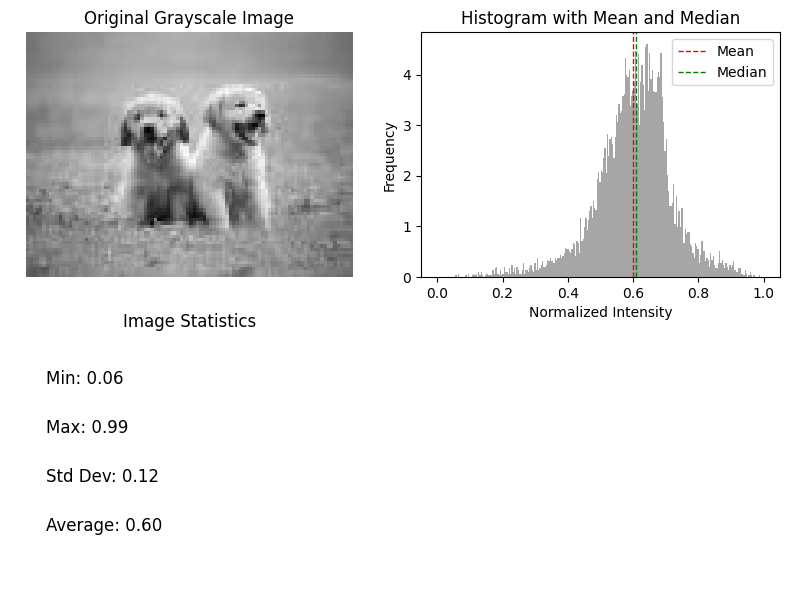

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Load a grayscale image
image_path = 'Image10.jpg'
image = io.imread(image_path)
image_gray = color.rgb2gray(image)  # Convert to grayscale

# Calculate mean and average intensity
mean_intensity = np.mean(image_gray)
average_intensity = np.average(image_gray)

# Calculate other statistical properties
min_intensity = np.min(image_gray)
max_intensity = np.max(image_gray)
std_deviation = np.std(image_gray)
median_intensity = np.median(image_gray)

# Display the original image and show computed statistics
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(image_gray.ravel(), bins=256, range=(0, 1), density=True, color='gray', alpha=0.7)
plt.axvline(mean_intensity, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_intensity, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.title('Histogram with Mean and Median')
plt.xlabel('Normalized Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.text(0.1, 0.8, f'Min: {min_intensity:.2f}', fontsize=12)
plt.text(0.1, 0.6, f'Max: {max_intensity:.2f}', fontsize=12)
plt.text(0.1, 0.4, f'Std Dev: {std_deviation:.2f}', fontsize=12)
plt.text(0.1, 0.2, f'Average: {average_intensity:.2f}', fontsize=12)
plt.axis('off')
plt.title('Image Statistics')

plt.tight_layout()
plt.show()
